#                Customer Churn Prediction Using Artificial Neural Network (ANN)
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [93]:
import pandas as pd
import tensorflow as Customer Churn Prediction Using Artificial Neural Network (ANN)
from tensorflow import keras
import matplotlib.pyplot as plt


In [94]:
df=pd.read_csv(r"D:\Simplilearn\Deep Learning with Keras and Tensorflow\Deep Learning Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [95]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2909,9619-GSATL,Female,0,No,No,43,Yes,No,DSL,No,...,No,Yes,No,No,One year,No,Electronic check,55.45,2444.25,No
6965,7789-CRUVC,Female,1,Yes,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),94.20,5895.45,No
194,2146-EGVDT,Male,0,Yes,Yes,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.30,1192.7,No
1408,5678-VFNEQ,Female,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.10,7412.25,No
3718,8468-EHYJA,Female,0,Yes,No,57,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,5497.05,No


In [96]:
df.shape

(7043, 21)

In [97]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [98]:
df.drop('customerID',axis=1,inplace=True)

In [99]:
df.shape

(7043, 20)

In [100]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [101]:
#as TotalCharges has string value need to convert into numeric i.e.float or int
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

pd.to_numeric(df.TotalCharges)

In [102]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [103]:
#As TotalCharges contain some null value as well.removing these null value and then convert into numeric
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [104]:
df[df.TotalCharges==" "].shape

(11, 20)

In [105]:
df.TotalCharges.shape

(7043,)

In [106]:
df1=df[df.TotalCharges!=" "]

In [107]:
df1.TotalCharges.shape

(7032,)

In [108]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [109]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [110]:
#Now want to see all the unique values in all the columns
for columns in df:
    print(df[columns].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [111]:
#Now want to see all the unique values with all the columns name as well
for columns in df:
    print(f"{columns}:{df[columns].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889

In [112]:
#def a function with these unique value which has dtypes object only
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes=='object':
            print(f"{columns}:{df[columns].unique()}")
print_unique_col_values(df1)            

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [113]:
#Sum of the columns has redundancy like MultipleLines,DeviceProtection etc
#so replacing these value with NO or Yes with use if df1.replace('original name','replace name',inplace=True) 

In [114]:
df1.replace('No internet service','No',inplace=True) 
df1.replace('No phone service','No',inplace=True) 

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [115]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [116]:
#Now replacing Yes/No with 1/0 
#first put all column into single name
#then replace it by using for loop
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
           'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [117]:
print_unique_col_values(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [118]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [119]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [120]:
df1.gender

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64

In [121]:
print_unique_col_values(df1)

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [122]:
#using get_dummies for rest of these columns
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [123]:
df2.shape

(7032, 27)

In [124]:
df1.shape

(7032, 20)

In [125]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [126]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [127]:
#Now want to see all the unique values with all the columns name as well
for columns in df2:
    print(f"{columns}:{df2[columns].unique()}")

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
InternetService_No:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [128]:
#Scaling the data using MinMaxScaler which convert everything between 0 and 1
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [129]:
cols_to_scale

['tenure', 'MonthlyCharges', 'TotalCharges']

In [130]:
df2.shape

(7032, 27)

# Modeling ANN

In [131]:
X=df2.drop('Churn',axis=1)
y=df2.Churn

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=5)

In [133]:
X_train.shape

(5625, 26)

In [134]:
X_test.shape

(1407, 26)

In [135]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),   #inut layers
    keras.layers.Dense(1,input_shape=(26,),activation='sigmoid'),   #output layer as we want only 1 output either 1 or 0
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5133 - accuracy: 0.7481
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7876
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8034
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8036
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8030
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8044
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4105 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8212
Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8215
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8201
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8180
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8210
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3845 - accuracy: 0.8204
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8224
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8181
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8210
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3839 - accuracy: 

In [136]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 921us/step - loss: 0.4475 - accuracy: 0.7868


[0.44750264286994934, 0.7867803573608398]

In [137]:
y_predicted=model.predict(X_test)
y_predicted[:10]
#sigmoid consider value >0.5 as yes else no

array([[0.3062186 ],
       [0.37811843],
       [0.00212887],
       [0.6988357 ],
       [0.49423215],
       [0.9076139 ],
       [0.17437184],
       [0.43492368],
       [0.24096182],
       [0.05771062]], dtype=float32)

In [138]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

# Classification Report

In [139]:
from sklearn.metrics import confusion_matrix,classification_report

ValueError: Classification metrics can't handle a mix of binary and continuous targets

print(classification_report(y_test,y_predicted))
#Classification metrics can't handle a mix of binary and continuous targets

In [141]:
#so converting y_predicted into 0 and 1
y_pred=[]
for element in y_predicted:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       999
           1       0.69      0.47      0.56       408

    accuracy                           0.79      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.79      0.77      1407



Text(69.0, 0.5, 'Truth')

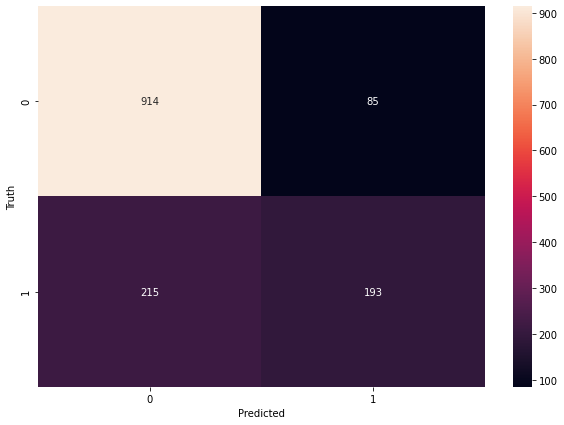

In [148]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')